In [53]:
import pandas
import requests
from bs4 import BeautifulSoup
import numpy as np
import os
import time
import numpy as np
import json
import nba_api.stats.endpoints as stats_endpoints
import nba_api.live.nba.endpoints as today_endpoints
import matplotlib.pyplot as plt
import matplotlib.patches as patches


player_list = {
    'ATL': ['Saddiq Bey', 'Clint Capela', 'John Collins', 'Jarrett Culver', 'Trent Forrest', 'AJ Griffin', 'Aaron Holiday', 'Justin Holiday', "De'Andre Hunter", 'Jalen Johnson', 'Frank Kaminsky', 'Dejounte Murray', 'Onyeka Okongwu', 'Trae Young'],
    'BOS': ['Malcolm Brogdon', 'Jaylen Brown', 'Blake Griffin', 'Al Horford', 'Mfiondu Kabengele', 'Luke Kornet','Mike Muscala','Payton Pritchard', 'Marcus Smart', 'Jayson Tatum', 'Noah Vonleh', 'Derrick White', 'Grant Williams'],
    'BRK': ['Mikal Bridges','Nic Claxton', 'Seth Curry','Spencer Dinwiddie','Joe Harris', 'Cameron Johnson','Dorian Finney-Smith','Spencer Dinwiddie','Patty Mills', "Royce O'Neale", 'Ben Simmons', 'Edmond Sumner', 'Cam Thomas', 'Yuta Watanabe'],
    'CHO': ['LaMelo Ball','James Bouknight','Gordon Hayward','Kai Jones','Theo Maledon','Cody Martin','Kelly Oubre Jr.','Nick Richards','Terry Rozier','Dennis Smith Jr.','P.J. Washington'],
    'CHI': ['Patrick Beverley','Tony Bradley','Alex Caruso','DeMar DeRozan','Goran Dragic','Andre Drummond','Javonte Green','Derrick Jones Jr.','Zach LaVine','Marko Simonovic','Nikola Vucevic','Coby White','Patrick Williams'],
    'CLE': ['Jarrett Allen','Mamadi Diakite','Darius Garland','Caris LeVert','Robin Lopez','Kevin Love','Donovan Mitchell','Evan Mobley','Raul Neto','Isaac Okoro','Lamar Stevens','Dean Wade'],
    'DAL': ['Davis Bertans','Reggie Bullock','Luka Doncic','Tyler Dorsey','Josh Green','Tim Hardaway Jr.','Jaden Hardy','Kyrie Irving','JaVale McGee','Markieff Morris','Dwight Powell','Christian Wood'],
    'DEN': ['Bruce Brown','Thomas Bryant','Kentavious Caldwell-Pope','Vlatko Cancar','Aaron Gordon','Jeff Green','Reggie Jackson','Nikola Jokic','DeAndre Jordan','Jamal Murray','Zeke Nnaji','Michael Porter Jr.','Ish Smith'],
    'DET': ['Marvin Bagley III','Bojan Bogdanovic','Alec Burks','Cade Cunningham','Hamidou Diallo','Jalen Duren','Killian Hayes','Jaden Ivey','Cory Joseph','Isaiah Livers','Rodney McGruder','Isaiah Stewart','James Wiseman'],
    'GSW': ['Stephen Curry','Donte DiVincenzo','Draymond Green','JaMychal Green','Ty Jerome','Jonathan Kuminga','Anthony Lamb','Kevon Looney','Moses Moody','Jordan Poole','Klay Thompson','Andrew Wiggins'],
    'HOU': ['Josh Christopher','Tari Eason','Bruno Fernando','Usman Garuba','Jalen Green','Boban Marjanovic','Kenyon Martin Jr.','Garrison Mathews','Kevin Porter Jr.','Alperen Sengun','Jabari Smith Jr.',"Jae'Sean Tate",'TyTy Washington Jr.'],
    'IND': ['Goga Bitadze','Oshae Brissett','Chris Duarte','Tyrese Haliburton','Buddy Hield','George Hill','Serge Ibaka','Isaiah Jackson','James Johnson','Bennedict Mathurin','T.J. McConnell','Andrew Nembhard','Aaron Nesmith','Jordan Nwora','Jalen Smith','Myles Turner'],
    'LAC': ['Nicolas Batum','Moses Brown','Amir Coffey','Robert Covington','Paul George','Eric Gordon','Bones Hyland','Kawhi Leonard','Terance Mann','Marcus Morris','Mason Plumlee','Norman Powell','Russell Westbrook','Ivica Zubac'],
    'LAL': ['Mo Bamba','Malik Beasley','Troy Brown Jr.','Anthony Davis','Wenyen Gabriel','LeBron James','Damian Jones','Rui Hachimura','Austin Reaves',"D'Angelo Russell",'Dennis Schroder','Jarred Vanderbilt','Lonnie Walker IV'],
    'MEM': ['Steven Adams','Santi Aldama','Desmond Bane','Dillon Brooks','Brandon Clarke','Jaren Jackson Jr.','Tyus Jones','Luke Kennard','John Konchar','Jake LaRavia','Ja Morant','David Roddy','Xavier Tillman Sr.'],
    'MIA': ['Bam Adebayo','Jimmy Butler','Jamal Cain','Dewayne Dedmon','Udonis Haslem','Tyler Herro','Haywood Highsmith','Nikola Jovic','Kyle Lowry','Caleb Martin','Duncan Robinson','Victor Oladipo','Max Strus','Gabe Vincent'],
    'MIL': ['Grayson Allen','Giannis Antetokounmpo','MarJon Beauchamp','Jevon Carter','Pat Connaughton','Jae Crowder','Jrue Holiday','Brook Lopez','Wesley Matthews','Bobby Portis'],
    'MIN': ['Nickeil Alexander-Walker','Kyle Anderson','Mike Conley','Anthony Edwards','Bryn Forbes','Rudy Gobert','Jaden McDaniels','Jordan McLaughlin','Jaylen Nowell','Taurean Prince','Naz Reid','Austin Rivers','Karl-Anthony Towns'],
    'NOP': ['Jose Alvarado','Dyson Daniels','Jaxson Hayes','Willy Hernangomez','Brandon Ingram','Herbert Jones','Naji Marshall','CJ McCollum','Trey Murphy III','Larry Nance Jr.','Josh Richardson','Jonas Valanciunas','Zion Williamson'],
    'NYK': ['RJ Barrett','Jalen Brunson','Evan Fournier','Quentin Grimes','Josh Hart','Isaiah Hartenstein','Miles McBride','Immanuel Quickley','Julius Randle','Mitchell Robinson','Derrick Rose','Jericho Sims','Obi Toppin'],
    'OKC': ['Ousmane Dieng','Luguentz Dort','Josh Giddey','Shai Gilgeous-Alexander','Isaiah Joe','Tre Mann','Aleksej Pokusevski','Jeremiah Robinson-Earl','Dario Saric','Aaron Wiggins','Jalen Williams','Jaylin Williams','Kenrich Williams'],
    'ORL': ['Cole Anthony','Mo Bamba','Paolo Banchero','Bol Bol','Wendell Carter Jr.','Markelle Fultz','Gary Harris','Caleb Houstan','Chuma Okeke','Terrence Ross','Admiral Schofield','Jalen Suggs','Franz Wagner','Moritz Wagner'],
    'PHI': ['Joel Embiid','James Harden','Montrezl Harrell','Tobias Harris','Furkan Korkmaz','Tyrese Maxey','Jalen McDaniels',"De'Anthony Melton",'Shake Milton','Georges Niang','Paul Reed','P.J. Tucker'],
    'PHO': ['Deandre Ayton','Darius Bazley','Bismack Biyombo','Devin Booker','Torrey Craig','Kevin Durant','Jock Landale','Damion Lee','Josh Okogie','Chris Paul','Cameron Payne','Landry Shamet','T.J. Warren'],
    'POR': ['Drew Eubanks','Jerami Grant','Keon Johnson','Kevin Knox','Damian Lillard','Nassir Little','Jusuf Nurkic','Cam Reddish','Shaedon Sharpe','Anfernee Simons','Matisse Thybulle','Trendon Watford','Justise Winslow'],
    'SAC': ['Harrison Barnes','Terence Davis','Matthew Dellavedova','Keon Ellis',"De'Aaron Fox",'Richaun Holmes','Kevin Huerter','Alex Len','Trey Lyles','Chimezie Metu','Davion Mitchell','Malik Monk','Keegan Murray','KZ Okpala','Domantas Sabonis'],
    'SAS': ['Charles Bassey','Keita Bates-Diop','Malaki Branham','Zach Collins','Gorgui Dieng',"Devonta Graham",'Keldon Johnson','Tre Jones','Romeo Langford','Doug McDermott','Isaiah Roby','Jeremy Sochan','Devin Vassell','Blake Wesley'],
    'TOR': ['Precious Achiuwa','OG Anunoby','Dalano Banton','Scottie Barnes','Chris Boucher','Malachi Flynn','Christian Koloko','Jakob Poeltl','Otto Porter Jr.','Pascal Siakam','Gary Trent Jr.','Fred VanVleet','Thaddeus Young'],
    'UTA': ['Nickeil Alexander-Walker','Jordan Clarkson','Rudy Gay','Talen Horton-Tucker','Walker Kessler','Lauri Markkanen','Kelly Olynyk','Collin Sexton'],
    'WAS': ['Deni Avdija','Will Barton','Bradley Beal','Daniel Gafford','Taj Gibson','Anthony Gill','Kendrick Nunn','Corey Kispert','Kyle Kuzma','Monte Morris','Kristaps Porzingis','Delon Wright']
}

teamIDkey = {'ATL':'1610612737','BRK':'1610612751','BOS':'1610612738','CHO':'1610612766','CLE':'1610612739',
             'CHI':'1610612741', 'DAL':'1610612742', 'DEN':'1610612743', 'DET':'1610612765', 'GSW':'1610612744',
             'HOU':'1610612745', 'IND':'1610612754', 'LAC':'1610612746','LAL':'1610612747','MEM':'1610612763',
             'MIA':'1610612748', 'MIL':'1610612749', 'MIN':'1610612750', 'NYK':'1610612752', 'NOP':'1610612740',
             'OKC':'1610612760', 'ORL':'1610612753', 'PHI':'1610612755', 'PHO':'1610612756','POR':'1610612757',
             'SAS':'1610612759', 'SAC':'1610612758', 'TOR':'1610612761','UTA':'1610612762','WAS':'1610612764'}
team_list = ['ATL', 'BOS','BRK', 'CHO', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS','TOR', 'UTA', 'WAS'] 

key = {'ATL':'AtlantaHawks', 'BRK':'BrooklynNets', 'BOS':'BostonCeltics', 'CHO':'CharlotteHornets','CHI':'ChicagoBulls','CLE':'ClevelandCavaliers','DAL':'DallasMavericks','DEN':'DenverNuggets','DET':'DetroitPistons',
           'GSW':'GoldenStateWarriors','HOU':'HoustonRockets','IND':'IndianaPacers','LAC':'LosAngelesClippers','LAL':'LosAngelesLakers','MEM':'MemphisGrizzlies','MIA':'MiamiHeat','MIL':'MilwaukeeBucks','MIN':'MinnesotaTimberwolves',
           'NOP':'NewOrleansPelicans','NYK':'NewYorkKnicks','OKC':'OklahomaCityThunder','ORL':'OrlandoMagic','PHI':'Philadelphia76ers','PHO':'PhoenixSuns','POR':'PortlandTrailBlazers','SAC':'SacramentoKings','SAS':'SanAntonioSpurs','TOR':'TorontoRaptors',
           'UTA':'UtahJazz','WAS':'WashingtonWizards'}
key_2 = {value: key for key, value in key.items()}



team_gameid_dictionary = {}
def make_dict_for_teamid_gameid():
    def get_gameids_team(teamid):
        log = stats_endpoints.teamgamelogs.TeamGameLogs(team_id_nullable = teamid, season_nullable = '2022-23')
        log = log.get_dict()
        log = log['resultSets']
        log = log[0]
        headers = log['headers']
        data = log['rowSet']
        df = pandas.DataFrame(data,columns = headers)
        new = df['GAME_ID'].to_list()
        return new



    for team in team_list:
        gameid_list = get_gameids_team(teamIDkey[team])
        team_gameid_dictionary[team] = gameid_list
    

'''
if team_gameid_dictionary == {}:
    make_dict_for_teamid_gameid()
else:
    pass

print('done')
'''



"\nif team_gameid_dictionary == {}:\n    make_dict_for_teamid_gameid()\nelse:\n    pass\n\nprint('done')\n"

In [54]:
def playerids():
    from nba_api.stats.static import players
    player_ids = {}

    for team in team_list:
        roster = player_list[team]
        for player in roster:
            try:
                if player == 'OG Anunoby':
                    player = 'O.G. Anunoby'
                player_ids[player] = players.find_players_by_full_name(player)[0]['id']
                
            except IndexError:
                print(f'player error: {player}')
                


    player_ids['OG Anunoby'] = player_ids.pop('O.G. Anunoby')
    player_ids_df = pandas.DataFrame(list(player_ids.items()), columns=['Name', 'ID'])
    
    return player_ids_df
playerids_df = playerids()

player error: Xavier Tillman Sr.
player error: Devonta Graham


In [55]:
player_pass_df = {}
class API():
    def __init__ (self,team_id,player_id,n_games,mode):
        self.teamid = team_id
        self.playerid = player_id
        self.n_games = n_games
        self.per_mode_simple = mode
    def playerdashptpass(self):
        df = stats_endpoints.playerdashptpass.PlayerDashPtPass(team_id = self.teamid, player_id = self.playerid, per_mode_simple = self.per_mode_simple, last_n_games = self.n_games )
        df = df.get_dict()
        df = df['resultSets']
        df = df[0]
        headers = df['headers']
        data = df['rowSet']
        df = pandas.DataFrame(data,columns = headers)
        df['PTS_FROM_PASSES'] = (df['FG2M']*2) + (df['FG3M']*3)

        return df
  





In [56]:
#find the teamid by player
#will have to reverse search the players_list to get the key from the players value



def get_pass_stats(player,mode,n_games):
    for team,players in player_list.items():       #find the team to which the player plays to get its teamid
        if player in players:
            teamid = teamIDkey[team]
            
    playerid = playerids_df.loc[playerids_df['Name'] == player,'ID']
    player_pass = API(team_id = teamid, player_id = playerid,mode = mode, n_games = n_games)
    player_pass = player_pass.playerdashptpass()            
    
    return player_pass

#Playername,['PerGame','Totals',number of games back]
#get_pass_stats('Julius Randle','PerGame',50)   #this would retrieve Julius Randles made passes dataframe at a PerGame rate over the last 50 games

FREE THROWS NOT INCLUDED 

PTS_FROM_PASSES  PASS_TO             
0.0              Iguodala, Andre         1
                 Lamb, Anthony           1
                 Moody, Moses            1
0.4              Baldwin Jr., Patrick    1
                 Looney, Kevon           1
0.6              Jerome, Ty              1
1.0              Green, JaMychal         1
1.2              Kuminga, Jonathan       1
2.6              DiVincenzo, Donte       1
3.2              Poole, Jordan           1
4.0              Thompson, Klay          1
7.2              Curry, Stephen          1
dtype: int64


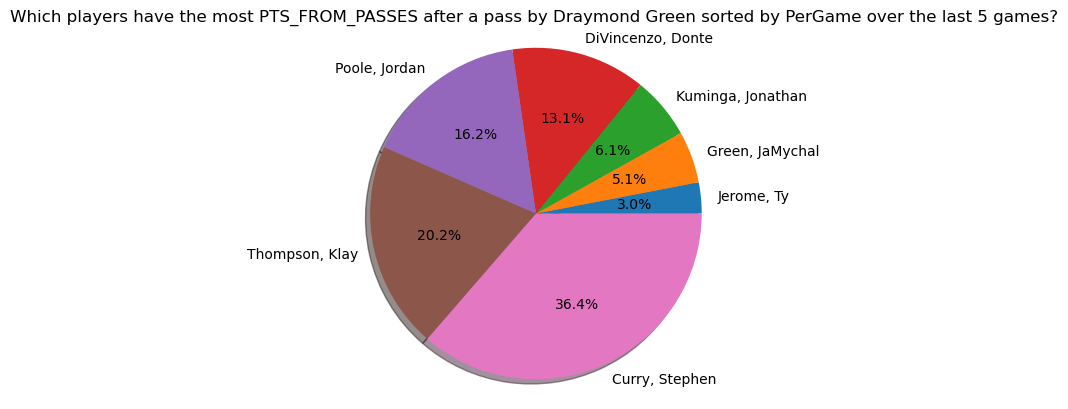

None


In [57]:

def passes(who,how,numbergames,what):
    
    player = get_pass_stats(who,how,numbergames)
    print('FREE THROWS NOT INCLUDED \n')




    test = player.groupby([what,'PASS_TO']).size()
    xx = test.index.get_level_values(0)
    print(test)


    if how == 'Totals':
        # Get the total number of FGA
        total_what = player[what].sum()

        # Filter out players with less than 2% of the total FGA
        test = test[test.index.get_level_values(0) > (total_what * 0.02)]

        # Create a list with percentages
        percentages = test.index.get_level_values(0).map(lambda x: (x / total_what) * 100)

        # Plot a pie chart
        plt.title(f'Which players have the most {what} after a pass by {who} sorted by {how} over the last {numbergames} games')
        plt.pie(percentages, labels=test.index.get_level_values(1), autopct='%1.1f%%', shadow=True)
        plt.axis('equal')
        plt.show()
    
    elif how == 'PerGame':

        # Get the total number of FGA
        total_what = player[what].sum()

        # Filter out players with less than 2% of the total FGA
        test = test[test.index.get_level_values(0) > (total_what * 0.02)]

        # Create a list with percentages
        percentages = test.index.get_level_values(0)
        #print(percentages)
        
        plt.title(f'Which players have the most {what} after a pass by {who} sorted by {how} over the last {numbergames} games?')
        plt.pie(percentages, labels=test.index.get_level_values(1), autopct='%1.1f%%', shadow=True)
        plt.axis('equal')
        plt.show()

        
#run this for pie chart
#who,what
#who : any player in the NBA
#what : 'FREQUENCY', 'PASS', 'AST', 'FGM', 'FGA', 'FG_PCT', 'FG2M', 'FG2A', 'FG2_PCT', 'FG3M', 'FG3A', 'FG3_PCT'


#NEED TO MATCH PLAYERS GAMES PLAYED OVER THE TEAMS LAST 'N' GAMES
#IE. FIND OUT HOW MANY GAMES VLATKO CANCAR HAS PLAYED OUT OF THE NUGGETS LAST 10 AND THEN TAKE HIS TOTAL 'WHAT' AND DIVIDE BY THAT NUMBER OF GAMES
#INSTEAD OF STILL DIVING THE TOTAL BY 10 GAMES EVEN IF THE PLAYER ONLY PLAYED 5 OF THEM

#print(passes('Nikola Jokic','Totals',10,'PTS_FROM_PASSES'))
print(passes('Draymond Green','PerGame',5,'PTS_FROM_PASSES'))



Home: MEM  Away: DAL


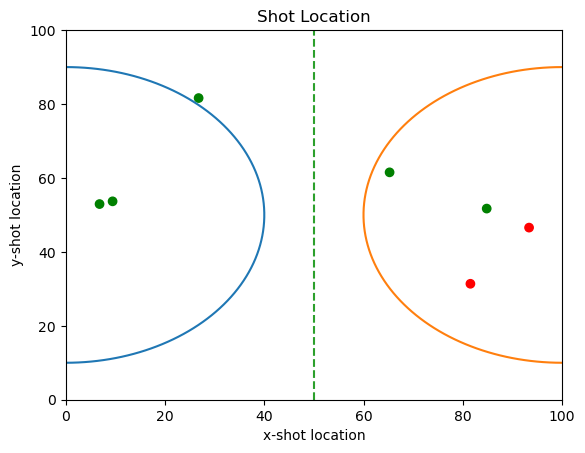

In [73]:
class pbp():
    
    def __init__(self,gameno):
        
        def json(URL):           
            resp = requests.get(URL)
            resp = resp.json()
            return resp
        
        self.gameids = []
        self.gameno_ = gameno
        self.teams = {}
        today = json('https://cdn.nba.com/static/json/liveData/scoreboard/todaysScoreboard_00.json')
        today = today['scoreboard']['games']
         
        
        for i in today:
            self.gameids.append(i['gameId'])
            self.teams[i['gameId']] = [i['homeTeam']['teamTricode'],i['awayTeam']['teamTricode']]
         
    
        #self.game is the game of each class instance
        self.game = self.gameids[self.gameno_]  
        #Find the teams
        self.teams = self.teams[self.game]
        #assign self.home and self.away as team tri codes (ie. 'ATL','IND')
        self.home,self.away = self.teams[0],self.teams[1]
        
        
        print(f'Home: {self.home}  Away: {self.away}')
        
    def pull_pbp(self):
        
        self.df = today_endpoints.playbyplay.PlayByPlay(game_id = self.game)
        self.df = self.df.get_dict()
        self.df = self.df['game']['actions']
        self.df = pandas.DataFrame(self.df)

        #columns
        columns = self.df.columns
        #print(columns)
        
        '''
        #variables
        self.actionNumber = self.df['actionNumber']
        self.clock = self.df['clock']
        self.timeActual = self.df['timeActual']
        self.period = self.df['period']
        self.periodType = self.df['periodType']
        self.actionType = self.df['actionType']
        self.subType = self.df['subType']
        self.qualifiers = self.df['qualifiers']
        self.personId = self.df['personId']
        self.x = self.df['x']
        self.y = self.df['y']
        self.possession = self.df['possession']
        self.scoreHome = self.df['scoreHome']
        self.scoreAway = self.df['scoreAway']
        self.edited = self.df['edited']
        self.orderNumber = self.df['orderNumber']
        self.isTargetScoreLastPeriod = self.df['isTargetScoreLastPeriod']
        self.xLegacy = self.df['xLegacy']
        self.yLegacy = self.df['yLegacy']
        self.isFieldGoal = self.df['isFieldGoal']
        self.side = self.df['side']
        self.description = self.df['description']
        self.personIdsFilter = self.df['personIdsFilter']
        self.teamId = self.df['teamId']
        self.teamTricode = self.df['teamTricode']
        self.descriptor = self.df['descriptor']
        self.jumpBallRecoveredName = self.df['jumpBallRecoveredName']
        self.jumpBallRecoverdPersonId = self.df['jumpBallRecoverdPersonId']
        self.playerName = self.df['playerName']
        self.playerNameI = self.df['playerNameI']
        self.jumpBallWonPlayerName = self.df['jumpBallWonPlayerName']
        self.jumpBallWonPersonId = self.df['jumpBallWonPersonId']
        self.jumpBallLostPlayerName = self.df['jumpBallLostPlayerName']
        self.jumpBallLostPersonId = self.df['jumpBallLostPersonId']
        self.area = self.df['area']
        self.areaDetail = self.df['areaDetail']
        self.shotDistance = self.df['shotDistance']
        self.shotResult = self.df['shotResult']
        self.shotActionNumber = self.df['shotActionNumber']
        self.reboundTotal = self.df['reboundTotal']
        self.reboundDefensiveTotal = self.df['reboundDefensiveTotal']
        self.reboundOffensiveTotal = self.df['reboundOffensiveTotal']
        self.pointsTotal = self.df['pointsTotal']
        self.assistPlayerNameInitial = self.df['assistPlayerNameInitial']
        self.assistPersonId = self.df['assistPersonId']
        self.assistTotal = self.df['assistTotal']
        self.turnoverTotal = self.df['turnoverTotal']
        self.stealPlayerName = self.df['stealPlayerName']
        self.stealPersonId = self.df['stealPersonId']
        self.officialId = self.df['officialId']
        self.foulPersonalTotal = self.df['foulPersonalTotal']
        self.foulTechnicalTotal = self.df['foulTechnicalTotal']
        self.foulDrawnPlayerName = self.df['foulDrawnPlayerName']
        self.foulDrawnPersonId = self.df['foulDrawnPersonId']
        self.blockPlayerName = self.df['blockPlayerName']
        self.blockPersonId = self.df['blockPersonId']
        '''
    
        
        
    def shot_df(self):
        self.pull_pbp()
        self.shots_df = self.df[(self.df['isFieldGoal'] == 1) & (self.df['period'] == 2)][['actionType','shotResult','x','y','period']]
        
        #create scatterplot of shot location
        #assign the x,y coordinates of shots to 'x','y'
        x,y = self.shots_df['x'],self.shots_df['y']
        #initialize the plot
        plt.scatter(x,y, c = np.where(self.shots_df['shotResult']=='Made', 'green', 'red'))
        
        
        # Create the angles for the first semi-circle
        angles1 = np.linspace(-np.pi/2, np.pi/2, 100)
        # Create the angles for the second semi-circle
        angles2 = np.linspace(np.pi/2, 3*np.pi/2, 100)
        # Create the radius
        radius = 40
        # Set the x and y coordinates for the first semi-circle
        x1 = radius*np.cos(angles1)
        y1 = radius*np.sin(angles1) + 50
        # Set the x and y coordinates for the second semi-circle
        x2 = radius*np.cos(angles2) + 100
        y2 = radius*np.sin(angles2) + 50
        # Set limits
        plt.xlim(0, 100)
        plt.ylim(0, 100)
        # Plot the first semi-circle
        plt.plot(x1, y1)
        # Plot the second semi-circle
        plt.plot(x2, y2)
        # Plot the vertical line
        plt.plot([50, 50], [0, 100], '--')


        #insert labels/titles
        plt.xlabel('x-shot location')
        plt.ylabel('y-shot location')
        plt.title(f'Shot Location')
        #execute and display the team_shots plot 
        plt.show()
        
        
        
        #return self.shots_df
    
instance = pbp(5)
shot_df = instance.shot_df()
shot_df

    